## Model Training

### 1.1 Import Data and Required Packages

In [1]:
# import required libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso ,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#### 1.1.1 Import the CSV Data as Pandas DataFrame

In [2]:
# importing Data
data = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\Data_Science_Project\Bankruptcy Prevention-Classification\Data\Turbofan_HPC_Efficiency.csv")

#### 1.1.2 Show Top 5 Records

In [3]:
data.head(5)

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
0,38.467255,11.217579,102.952769,14.349541,120.587661,445.559446,1.666404,308.277091,2.342404,0.999534,1.103993,14944.835419,3261.916032,0.551987,40.134570,722.008949,0.861717
1,44.217856,13.586609,108.449503,15.271965,134.847057,512.666723,1.838548,310.964933,2.424760,0.999713,1.218305,14944.835419,3457.002243,0.675294,44.290294,810.585622,0.789251
2,38.413089,11.196754,102.897310,14.342064,120.453052,444.968535,1.664960,308.252517,2.341573,0.999532,1.103032,14944.835419,3260.182614,0.550923,40.099662,721.251985,0.862491
3,34.905462,9.798766,99.285488,13.898886,111.670620,407.283489,1.570330,306.645196,2.287458,0.999362,1.039987,14944.835419,3143.194846,0.485147,37.807693,677.901510,0.911628
4,38.788102,11.340700,103.280789,14.394312,121.384538,449.064098,1.674947,308.422881,2.347317,0.999547,1.109677,14944.835419,3272.188503,0.558328,40.341220,726.539704,0.857156


###  1.2 Preparing X and Y variables

In [4]:
X = data.drop(columns=['Isentr.HPCEfficiency'],axis=1)

In [5]:
X.head()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K
0,38.467255,11.217579,102.952769,14.349541,120.587661,445.559446,1.666404,308.277091,2.342404,0.999534,1.103993,14944.835419,3261.916032,0.551987,40.134570,722.008949
1,44.217856,13.586609,108.449503,15.271965,134.847057,512.666723,1.838548,310.964933,2.424760,0.999713,1.218305,14944.835419,3457.002243,0.675294,44.290294,810.585622
2,38.413089,11.196754,102.897310,14.342064,120.453052,444.968535,1.664960,308.252517,2.341573,0.999532,1.103032,14944.835419,3260.182614,0.550923,40.099662,721.251985
3,34.905462,9.798766,99.285488,13.898886,111.670620,407.283489,1.570330,306.645196,2.287458,0.999362,1.039987,14944.835419,3143.194846,0.485147,37.807693,677.901510
4,38.788102,11.340700,103.280789,14.394312,121.384538,449.064098,1.674947,308.422881,2.347317,0.999547,1.109677,14944.835419,3272.188503,0.558328,40.341220,726.539704


In [6]:
y = data['Isentr.HPCEfficiency']

In [7]:
y

0        0.861717
1        0.789251
2        0.862491
3        0.911628
4        0.857156
           ...   
11966    0.875314
11967    0.890465
11968    0.853620
11969    0.837992
11970    0.887662
Name: Isentr.HPCEfficiency, Length: 11971, dtype: float64

### 1.3 Column Transformer to scale the dataset

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.columns # getting all columns from X varible dataframe as all columns are numerical

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(11971, 16)

### 1.4 Splitting dataset into training and testing dataset with ration 80:20 respectively

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9576, 16), (2395, 16))

### 1.5 Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    """ takes input as Training and testing dataframe from datasets and returns MAE,RMSE ans R2_Square value for the datasets"""
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

### 1.5.1 Automating the process of training the model

In [13]:
# Creating a dictonary as models in which all model to be trained on dataset includes
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0308
- Mean Absolute Error: 0.0254
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0308
- Mean Absolute Error: 0.0254
- R2 Score: -0.0005


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0002
- Mean Absolute Error: 0.0002
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0002
- Mean Absolute Error: 0.0002
- R2 Score: 0.9999


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------

### 1.6 Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
5,Random Forest Regressor,1.000000
4,Decision Tree,1.000000
3,K-Neighbors Regressor,1.000000
7,CatBoosting Regressor,0.999956
6,XGBRegressor,0.999946
2,Ridge,0.999945
8,AdaBoost Regressor,0.996947
1,Lasso,-0.000468


#### 1.6.1 Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


#### 1.6.2 Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

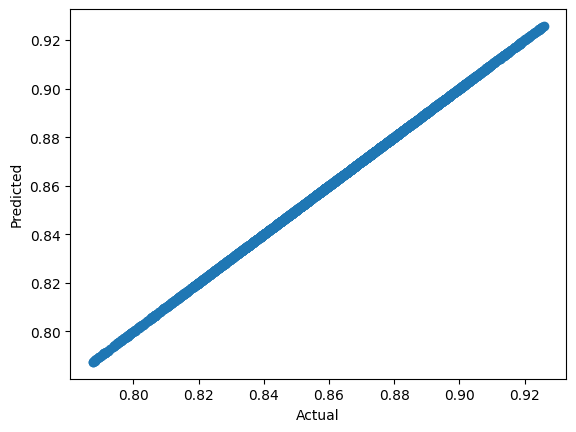

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

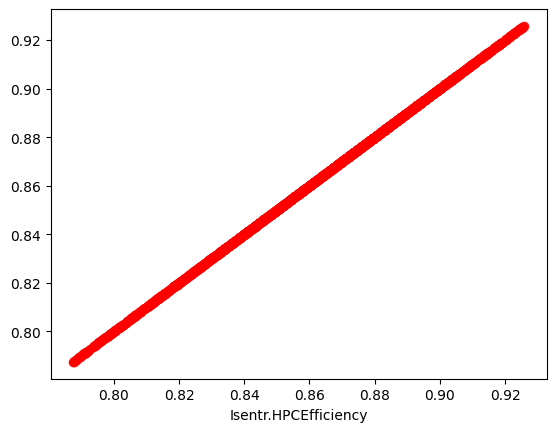

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### 1.6.3 Difference between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6244,0.841641,0.841641,-1.157413e-07
1351,0.863650,0.863641,9.430337e-06
9380,0.841064,0.841063,1.141521e-06
3616,0.834281,0.834286,-4.159822e-06
304,0.850273,0.850274,-1.305156e-06
...,...,...,...
5821,0.849462,0.849464,-2.510985e-06
1112,0.838923,0.838916,7.437263e-06
2405,0.843065,0.843068,-3.349417e-06
10292,0.852485,0.852483,1.890629e-06
